## K Means Clustring Algorithms Implementation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np 
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples = 1000, centers=3, n_features = 2, random_state=23)
#make_blobs ka use karne pe ye X and y ki value deta hi hai 
# X = Independentvalues
# y = Dependent values
# Clustring algorithmm me y ki value lete hi nahi hai 


In [5]:
X.shape

(1000, 2)

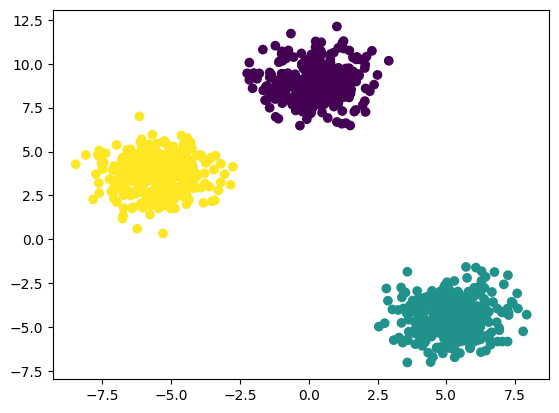

In [7]:
plt.scatter(X[:,0],X[:,1],) 
# c= y labels ke through lana hai basically clustring karne ke baad lana hai.
# usualy real world senario me y output/dependent feature hota hi nahi hai.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

In [9]:
from sklearn.cluster import KMeans

In [13]:
# manual process
# k ka value kitna rakhna hai wo select karenge 
## Elbow Method to Select the K value

wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [14]:
wcss
## niche o/p me k ki value increase ke sath values bhi decrese ho rahe hai 

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1181.495200296287,
 992.0866512884327,
 853.3302187206469,
 843.0823166686704,
 716.7089121567095,
 626.2545925516913,
 536.0085193651828]

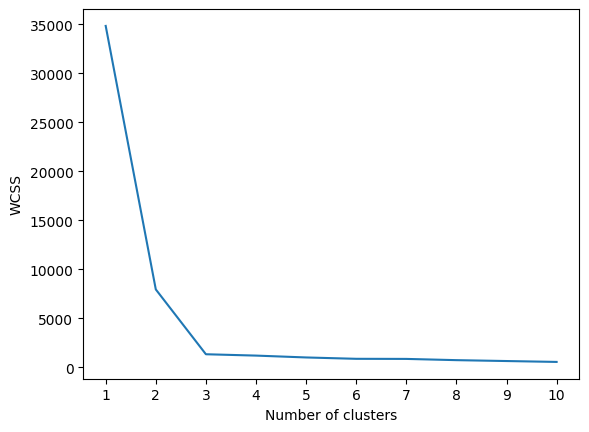

In [16]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
# K=3 hoga kyunki elbow 3 point se turn ho kar stable ho gaya hai 

In [18]:
kmeans = KMeans(n_clusters = 3, init= "k-means++")

In [19]:
y_labels = kmeans.fit_predict(X_train) #fit_predict() sirf training data ke lye hota hai 

In [22]:
y_test_label = kmeans.predict(X_test) # ye sirf test data k liye hota hai 

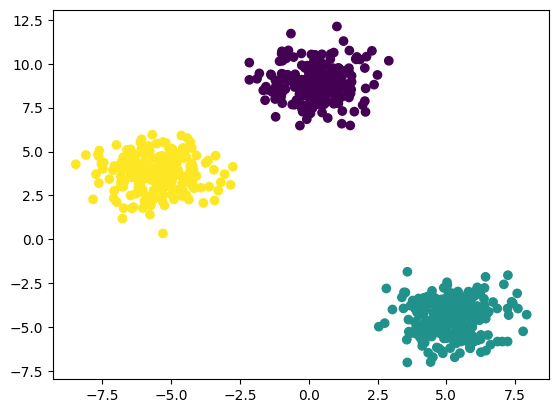

In [21]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_labels)

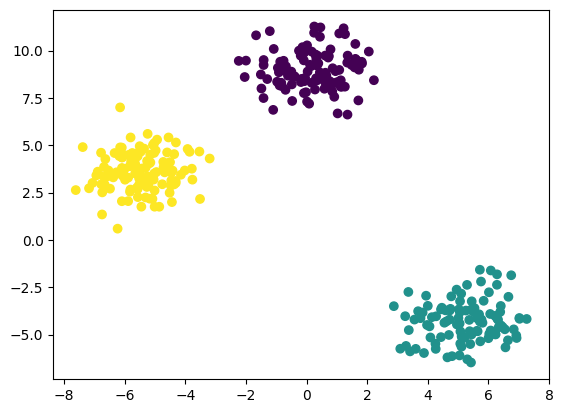

In [24]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test_label)

In [25]:
# abhi tak jo technique humne use kiya hai manualy kiye hai 
# ab agar humare pass bahoot se dat apoints hai to k ke diffrentalues se dekhna bahoot difficut hota hi 
# to agar hume automate karna hai or diff diff clusters dekhna hai to iske liye auomate karege
# auto mate karne k liye knee locator ka use karenge 



In [26]:
!pip install kneed

In [29]:
from kneed import KneeLocator

In [31]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
## jub wcss increase hota graph to curve = colclave use karte hai.
## but is condition me wcss ke graph me value decrease ho raha hai tub humlog
# curve = 'convex' lenge
kl.elbow

3

In [32]:
# knee locator ye bata diya ki kitna wlbow value hona chahiye
# elbow value matlab ki K=3 ki value 

In [33]:
## Performance metrics
## Silhoutte score
from sklearn.metrics import silhouette_score

In [35]:
silhoutte_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhoutte_coefficients.append(score)

In [36]:
silhoutte_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6501066091294404,
 0.4806050548653587,
 0.33587541391787956,
 0.33975394079547255,
 0.32438364205950665,
 0.3315403665969506,
 0.3395834246694441]

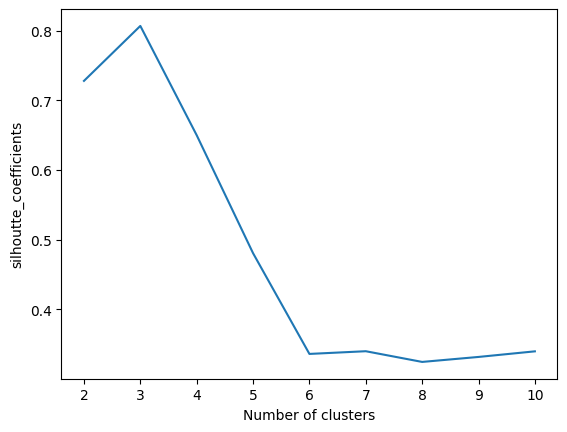

In [37]:
# ab ye pata lagayenge ki k =3 aya hai o value kya vo value correct hai 
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhoutte_coefficients")
plt.show()